In [1]:
from sklearn.svm import LinearSVR 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import loguniform, randint, uniform
from sklearn.pipeline import Pipeline 
from sklearn import metrics  
import math
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import time
import os  # 确保导入os模块

In [2]:
# 数据加载和预处理
data = pd.read_excel('data/CO2_20250208.xlsx', sheet_name='CO2 solubility data')

In [3]:
data.head(8)

,No.,IL,x_CO2 (mol/kg sorbent),T (K),P (bar),IF1,IF2,IF3,IF4,IF5,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
0,1,[Bis(mim)C2][Gly]2,0.8504,313.15,0.1154,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,[Bis(mim)C2][Gly]2,1.1442,313.15,0.2692,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,[Bis(mim)C2][Gly]2,1.4535,313.15,0.5385,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,[Bis(mim)C2][Gly]2,2.3503,313.15,0.8462,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,[Bis(mim)C2][Gly]2,2.4895,313.15,1.3077,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,[Bis(mim)C2][Gly]2,2.5823,313.15,1.7308,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,[Bis(mim)C2][Gly]2,2.6132,313.15,2.0000,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,[Bis(mim)C2][Gly]2,2.6441,313.15,2.9615,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(data.shape)

(2500, 49)


In [5]:
exclude =['No.','IL']
y='x_CO2 (mol/kg sorbent)'
features = [var for var in data.columns if var not in exclude+[y]]
print(len(features), len(exclude))

46 2


In [6]:
data = data.fillna(0)

In [7]:
data[features].info(show_counts = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   T (K)    2500 non-null   float64
 1   P (bar)  2500 non-null   float64
 2   IF1      2500 non-null   int64  
 3   IF2      2500 non-null   int64  
 4   IF3      2500 non-null   int64  
 5   IF4      2500 non-null   int64  
 6   IF5      2500 non-null   int64  
 7   IF6      2500 non-null   int64  
 8   IF7      2500 non-null   int64  
 9   IF8      2500 non-null   int64  
 10  IF9      2500 non-null   int64  
 11  IF10     2500 non-null   int64  
 12  IF11     2500 non-null   int64  
 13  IF12     2500 non-null   int64  
 14  IF13     2500 non-null   int64  
 15  IF14     2500 non-null   int64  
 16  IF15     2500 non-null   int64  
 17  IF16     2500 non-null   int64  
 18  IF17     2500 non-null   int64  
 19  IF18     2500 non-null   int64  
 20  IF19     2500 non-null   int64  
 21  IF20     2500 

In [8]:
single_var =[]
for var in features:
    print(var, "----",len(data[var].unique()),data[var].unique()) 
    if len(data[var].unique())==1:
        single_var.append(var)

T (K) ---- 48 [313.15 293.15 303.15 323.15 298.2  298.1  298.   298.3  288.15 298.15
 308.15 318.15 303.16 313.28 313.31 323.32 323.34 333.35 333.36 333.41
 353.55 353.18 295.15 283.1  323.1  348.1  348.2  310.15 333.15 343.15
 303.2  313.2  323.2  343.2  353.2  328.15 338.15 333.2  295.12 353.15
 296.15 373.15 393.15 308.   318.   328.   338.   283.15]
P (bar) ---- 1112 [0.1154 0.2692 0.5385 ... 0.234  0.239  0.419 ]
IF1 ---- 4 [ 2  1  0 10]
IF2 ---- 2 [0 1]
IF3 ---- 3 [0 2 1]
IF4 ---- 2 [0 1]
IF5 ---- 2 [0 1]
IF6 ---- 5 [ 0  1  2  3 10]
IF7 ---- 2 [0 1]
IF8 ---- 2 [0 1]
IF9 ---- 2 [0 1]
IF10 ---- 4 [0 3 2 1]
IF11 ---- 2 [0 1]
IF12 ---- 3 [0 2 1]
IF13 ---- 3 [0 1 2]
IF14 ---- 2 [0 1]
IF15 ---- 11 [ 2  4  5  3 20  1  6  8 12  7 40]
IF16 ---- 32 [  4   2   6   3   5   7   8   1  25  11  14   0  10  31  29  30  32  20
  26  21  12  24  22  33  17  13  16  28 295  58  57  56]
IF17 ---- 3 [0 1 2]
IF18 ---- 2 [0 1]
IF19 ---- 2 [0 1]
IF20 ---- 3 [0 2 1]
IF21 ---- 2 [0 1]
IF22 ---- 14 [ 6 12 

In [9]:
single_var

[]

In [10]:
# 确保只使用数值特征
use_features = [var for var in features if data[var].dtype in ['int64', 'float64']]

print(f"使用的特征数量: {len(use_features)}")
print(f"特征列表: {use_features}")

使用的特征数量: 46
特征列表: ['T (K)', 'P (bar)', 'IF1', 'IF2', 'IF3', 'IF4', 'IF5', 'IF6', 'IF7', 'IF8', 'IF9', 'IF10', 'IF11', 'IF12', 'IF13', 'IF14', 'IF15', 'IF16', 'IF17', 'IF18', 'IF19', 'IF20', 'IF21', 'IF22', 'IF23', 'IF24', 'IF25', 'IF26', 'IF27', 'IF28', 'IF29', 'IF30', 'IF31', 'IF32', 'IF33', 'IF34', 'IF35', 'IF36', 'IF37', 'IF38', 'IF39', 'IF40', 'IF41', 'IF42', 'IF43', 'IF44']


In [11]:
# 分割数据
X_train, X_test, y_train, y_test = train_test_split(
    data[use_features], data[y], test_size=0.2, random_state=512
)

print(f"训练集形状: {X_train.shape}, 测试集形状: {X_test.shape}")

训练集形状: (2000, 46), 测试集形状: (500, 46)


In [12]:
X_train

,T (K),P (bar),IF1,IF2,IF3,IF4,IF5,IF6,IF7,IF8,...,IF35,IF36,IF37,IF38,IF39,IF40,IF41,IF42,IF43,IF44
268,288.15,3.5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,298.10,6.9990,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1891,308.00,1.0000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1647,373.15,0.5920,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
398,308.15,0.1830,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,308.15,1.5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2305,303.15,0.7870,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1181,313.15,7.2286,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360,298.10,0.5040,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
single_var

[]

In [14]:
# 检查数据中是否还有非数值值
print("\n检查数据类型:")
print(X_train.dtypes)



检查数据类型:
T (K)      float64
P (bar)    float64
IF1          int64
IF2          int64
IF3          int64
IF4          int64
IF5          int64
IF6          int64
IF7          int64
IF8          int64
IF9          int64
IF10         int64
IF11         int64
IF12         int64
IF13         int64
IF14         int64
IF15         int64
IF16         int64
IF17         int64
IF18         int64
IF19         int64
IF20         int64
IF21         int64
IF22         int64
IF23         int64
IF24         int64
IF25         int64
IF26         int64
IF27         int64
IF28         int64
IF29         int64
IF30         int64
IF31         int64
IF32         int64
IF33         int64
IF34         int64
IF35         int64
IF36         int64
IF37         int64
IF38         int64
IF39         int64
IF40         int64
IF41         int64
IF42         int64
IF43         int64
IF44         int64
dtype: object


In [15]:
# 设置全局样式
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial']

In [16]:
# 1. 同时评估训练集和测试集
def evaluate_model_full(model, X_train, y_train, X_test, y_test):
    """
    评估模型在训练集和测试集上的各种指标
    """
    # 训练集预测和评估
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_aard = 100 * np.mean(np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)))
    
    # 测试集预测和评估
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_aard = 100 * np.mean(np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)))
    
    return {
        'train': {
            'R2': train_r2, 
            'MAE': train_mae, 
            'MSE': train_mse, 
            'RMSE': train_rmse, 
            'AARD%': train_aard
        },
        'test': {
            'R2': test_r2, 
            'MAE': test_mae, 
            'MSE': test_mse, 
            'RMSE': test_rmse, 
            'AARD%': test_aard
        },
        'predictions': {
            'y_train_pred': y_train_pred,
            'y_test_pred': y_test_pred
        }
    }


In [17]:
# 2. 定义不同核函数的参数
param_distributions = {
    'linear': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__epsilon': loguniform(1e-3, 0.1)
    },
    'rbf': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__gamma': loguniform(1e-5, 1e2),
        'svr__epsilon': loguniform(1e-3, 0.1)
    },
    'poly': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__epsilon': loguniform(1e-3, 0.1),
        'svr__degree': randint(2, 5),  # 2到4的整数
        'svr__coef0': uniform(0, 1)
    },
    'sigmoid': {
        'svr__C': loguniform(1e-3, 1e3),
        'svr__gamma': loguniform(1e-5, 1e2),
        'svr__coef0': uniform(0, 1),
        'svr__epsilon': loguniform(1e-3, 0.1)
    }
}

# 初始化结果存储
results = {}
best_models = {}

In [18]:
# 3. 对每种核函数进行随机搜索
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"\n正在训练 {kernel} 核函数...")
    start_time = time.time()
    
    # 创建pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel=kernel))
    ])
    
    # 随机搜索
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions[kernel],
        n_iter=100,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        n_jobs=-1,
        random_state=512,
        pre_dispatch='2*n_jobs'
    )
    
    try:
        # 在训练集上拟合随机搜索
        random_search.fit(X_train, y_train)
        
        # 存储最佳模型和其交叉验证分数
        best_model = random_search.best_estimator_
        best_cv_score = -random_search.best_score_
        best_params = random_search.best_params_
        
        print(f"Best CV MSE for {kernel}: {best_cv_score:.4f}")
        print(f"Best Parameters: {best_params}")
        
        # 用最佳模型在训练集和测试集上进行评估
        full_metrics = evaluate_model_full(best_model, X_train, y_train, X_test, y_test)
        
        # 存储所有结果
        results[kernel] = {
            'best_model': best_model,
            'best_cv_score': best_cv_score,
            'best_params': best_params,
            'train_metrics': full_metrics['train'],
            'test_metrics': full_metrics['test']
        }
        
        end_time = time.time()
        print(f"{kernel} 核函数训练完成，耗时: {end_time - start_time:.2f} 秒")
        
    except Exception as e:
        print(f"训练 {kernel} 核函数时出错: {e}")
        import traceback
        traceback.print_exc()
        continue


正在训练 linear 核函数...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for linear: 0.9437
Best Parameters: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
linear 核函数训练完成，耗时: 2088.72 秒

正在训练 rbf 核函数...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for rbf: 0.2264
Best Parameters: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
rbf 核函数训练完成，耗时: 57.13 秒

正在训练 poly 核函数...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for poly: 0.4732
Best Parameters: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
poly 核函数训练完成，耗时: 162.55 秒

正在训练 sigmoid 核函数...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best CV MSE for sigmoid: 0.9747
Best Parameters: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__ga

In [20]:
# 4. 汇总并比较所有模型在训练集和测试集上的性能
if results:
    print("\n" + "="*80)
    print("FINAL COMPARISON - TRAINING SET PERFORMANCE")
    print("="*80)
    
    # 训练集性能比较
    train_comparison_df = pd.DataFrame()
    for kernel_name, res in results.items():
        train_metrics = res['train_metrics']
        train_comparison_df[kernel_name] = pd.Series(train_metrics)
    
    train_comparison_df = train_comparison_df.T
    print("训练集性能:")
    print(train_comparison_df.round(4))
    
    print("\n" + "="*80)
    print("FINAL COMPARISON - TEST SET PERFORMANCE")
    print("="*80)
    
    # 测试集性能比较
    test_comparison_df = pd.DataFrame()
    for kernel_name, res in results.items():
        test_metrics = res['test_metrics']
        test_comparison_df[kernel_name] = pd.Series(test_metrics)
    
    test_comparison_df = test_comparison_df.T
    print("测试集性能:")
    print(test_comparison_df.round(4))


FINAL COMPARISON - TRAINING SET PERFORMANCE
训练集性能:
             R2     MAE     MSE    RMSE     AARD%
linear   0.3888  0.5667  0.8945  0.9458  104.7328
rbf      0.9383  0.1268  0.0904  0.3006   27.7841
poly     0.8726  0.1956  0.1865  0.4318   29.7616
sigmoid  0.3661  0.5818  0.9277  0.9632  126.8622

FINAL COMPARISON - TEST SET PERFORMANCE
测试集性能:
             R2     MAE     MSE    RMSE     AARD%
linear   0.2601  0.6169  1.0204  1.0101  100.4916
rbf      0.8440  0.2138  0.2152  0.4639   32.3137
poly     0.7761  0.2861  0.3088  0.5557   40.4569
sigmoid  0.2766  0.6190  0.9977  0.9989  107.8958


In [21]:
    # 5. 输出各个kernel的最佳参数
    print("\n" + "="*80)
    print("BEST PARAMETERS FOR EACH KERNEL")
    print("="*80)
    
    for kernel_name, res in results.items():
        print(f"\n{kernel_name.upper()} Kernel Best Parameters:")
        for param_name, param_value in res['best_params'].items():
            clean_param_name = param_name.replace('svr__', '')
            print(f"  {clean_param_name}: {param_value}")


BEST PARAMETERS FOR EACH KERNEL

LINEAR Kernel Best Parameters:
  C: 0.10257451272312866
  epsilon: 0.015982104772500425

RBF Kernel Best Parameters:
  C: 34.879281104286264
  epsilon: 0.006901630770467411
  gamma: 0.21197417334052496

POLY Kernel Best Parameters:
  C: 604.5915517293635
  coef0: 0.7495513992401993
  degree: 3
  epsilon: 0.008276508883382664

SIGMOID Kernel Best Parameters:
  C: 265.923975925871
  coef0: 0.04844189034552504
  epsilon: 0.0012501565002126212
  gamma: 4.622351923490326e-05


In [22]:
    # 6. 根据测试集性能选择最佳模型
    print("\n" + "="*80)
    print("BEST MODEL SELECTION (BASED ON TEST SET)")
    print("="*80)
    
    if 'R2' in test_comparison_df.columns:
        best_kernel_by_r2 = test_comparison_df['R2'].idxmax()
        print(f"Best kernel based on R²: {best_kernel_by_r2}")
        print(f"Test R²: {test_comparison_df.loc[best_kernel_by_r2, 'R2']:.4f}")
        print(f"Train R²: {train_comparison_df.loc[best_kernel_by_r2, 'R2']:.4f}")
    
    if 'AARD%' in test_comparison_df.columns:
        best_kernel_by_aard = test_comparison_df['AARD%'].idxmin()
        print(f"\nBest kernel based on AARD%: {best_kernel_by_aard}")
        print(f"Test AARD%: {test_comparison_df.loc[best_kernel_by_aard, 'AARD%']:.2f}%")
        print(f"Train AARD%: {train_comparison_df.loc[best_kernel_by_aard, 'AARD%']:.2f}%")


BEST MODEL SELECTION (BASED ON TEST SET)
Best kernel based on R²: rbf
Test R²: 0.8440
Train R²: 0.9383

Best kernel based on AARD%: rbf
Test AARD%: 32.31%
Train AARD%: 27.78%


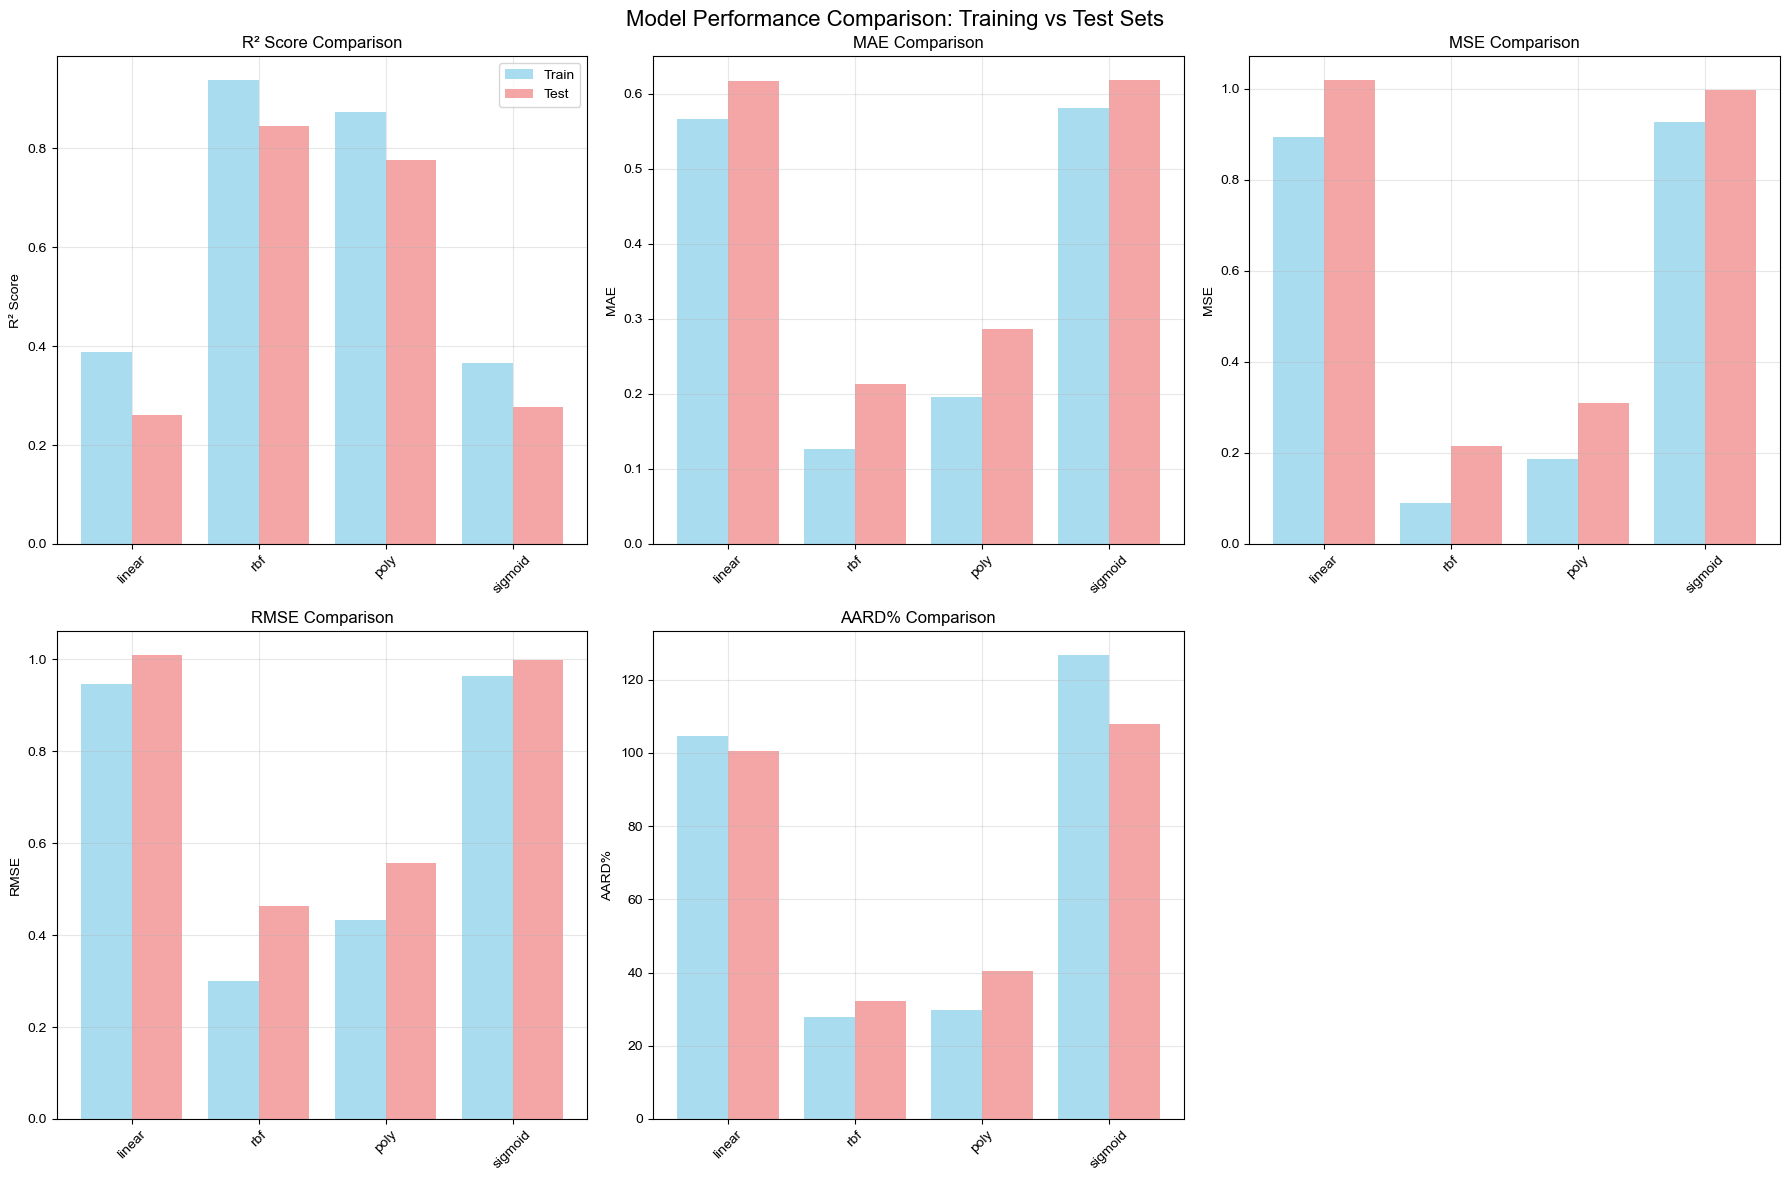

模型性能比较可视化完成！


In [23]:
# 7. 可视化比较结果
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Comparison: Training vs Test Sets', fontsize=16)

model_names = list(results.keys())
metrics_info = [
    ('R2', 'R² Score', 'R² Score Comparison'),
    ('MAE', 'MAE', 'MAE Comparison'),
    ('MSE', 'MSE', 'MSE Comparison'),
    ('RMSE', 'RMSE', 'RMSE Comparison'),
    ('AARD%', 'AARD%', 'AARD% Comparison')
]

for i, (metric, ylabel, title) in enumerate(metrics_info):
    row = i // 3
    col = i % 3
    
    # 所有子图使用相同的颜色
    axes[row, col].bar([x - 0.2 for x in range(len(results))], train_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Train' if i == 0 else "", color='skyblue')
    axes[row, col].bar([x + 0.2 for x in range(len(results))], test_comparison_df[metric], 
                      width=0.4, alpha=0.7, label='Test' if i == 0 else "", color='lightcoral')
    
    axes[row, col].set_title(title)
    axes[row, col].set_ylabel(ylabel)
    axes[row, col].set_xticks(range(len(results)))
    axes[row, col].set_xticklabels(model_names, rotation=45)
    axes[row, col].grid(True, alpha=0.3)
    
    # 只在第一个子图显示图例
    if i == 0:
        axes[row, col].legend()

# 隐藏第六个子图
axes[1, 2].set_visible(False)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("模型性能比较可视化完成！")

In [24]:
# 首先需要运行模型优化部分的代码
optimized_models = {}
best_params = {}


In [25]:
    # 存储优化后的模型
    optimized_models[kernel] = random_search.best_estimator_
    best_params[kernel] = random_search.best_params_
    
    print(f"最佳参数: {random_search.best_params_}")
    print(f"最佳交叉验证 R²: {random_search.best_score_:.4f}")
    print(f"训练时间: {end_time - start_time:.2f} 秒")
    
    # 在测试集上评估
    test_score = random_search.score(X_test, y_test)
    print(f"测试集 R²: {test_score:.4f}")

最佳参数: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
最佳交叉验证 R²: -0.9747
训练时间: 16.41 秒
测试集 R²: -0.9977


In [32]:
# 8. 定义可视化评估函数

# 首先定义 calculate_metrics 函数
def calculate_metrics(y_true, y_pred):
    """
    计算回归模型的评估指标
    """
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    aard = 100 * np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-10, None)))
    
    return r2, mae, mse, rmse, aard

# 然后定义 calculate_90_percent_range 函数
def calculate_90_percent_range(errors):
    """计算90%数据点落入的残差范围"""
    lower_bound = np.percentile(errors, 5)
    upper_bound = np.percentile(errors, 95)
    in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
    total = len(errors)
    percentage = (in_range / total) * 100
    return lower_bound, upper_bound, percentage
def plot_model_evaluation(kernel_name, model, X_train, y_train, X_test, y_test, best_params):
    """为每个核函数模型生成四种可视化图表"""
    
    # 获取预测值
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 计算误差
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # 计算评估指标
    train_r2, train_mae, train_mse, train_rmse, train_aard = calculate_metrics(y_train, y_train_pred)
    test_r2, test_mae, test_mse, test_rmse, test_aard = calculate_metrics(y_test, y_test_pred)
    
    # 计算90%范围
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # 计算误差在[-0.25, 0.25]范围内的百分比
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # 设置全局样式参数
    border_width = 2.0  # 外框粗细
    tick_fontsize = 14  # 坐标轴标尺字号
    label_fontsize = 16  # 坐标轴标签字号
    title_fontsize = 18  # 标题字号
    tick_width = 2.0    # 刻度线粗细
    tick_length = 6     # 刻度线长度
    
    # 1. 预测值与真实值对比图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    # 设置外框粗细和颜色
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    # 设置坐标轴范围
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.title(f"Predicted vs Experimental Capacity ({kernel_name})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    # 设置坐标轴标尺字号
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. 残差 vs 预测值图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residual Plot ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. 残差 vs 实验值图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residuals vs Experimental Capacity ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. 误差分布图（按指定区间划分）
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # 按照指定的区间划分：0.25为间隔
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    # 生成区间边界
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    # 排序并去重
    bin_edges = sorted(set(bin_edges))
    
    # 绘制训练集和测试集误差分布
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=18, fontname='Arial')
    plt.title(f'Error Distribution ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontsize=tick_fontsize, fontname='Arial')
    plt.yticks(fontsize=tick_fontsize, fontname='Arial')
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 打印详细的统计信息
    print("="*80)
    print(f"{kernel_name} 模型详细统计信息")
    print("="*80)
    
    # 基本性能指标
    print(f"最佳参数: {best_params}")
    print(f"训练集R²: {train_r2:.4f}")
    print(f"测试集R²: {test_r2:.4f}")
    print(f"训练集MAE: {train_mae:.4f} mol/kg")
    print(f"测试集MAE: {test_mae:.4f} mol/kg")
    print(f"训练集RMSE: {train_rmse:.4f} mol/kg")
    print(f"测试集RMSE: {test_rmse:.4f} mol/kg")
    
    # 残差分析数据
    print(f"\n📊 残差分析 - 90%数据点范围:")
    print(f"训练集: {train_percentage:.1f}% 在 [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"测试集: {test_percentage:.1f}% 在 [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\n📊 残差统计:")
    print(f"训练集残差均值: {train_errors.mean():.4f} mol/kg (越接近0越好)")
    print(f"测试集残差均值: {test_errors.mean():.4f} mol/kg (越接近0越好)")
    print(f"训练集残差标准差: {train_errors.std():.4f} mol/kg (越小越好)")
    print(f"测试集残差标准差: {test_errors.std():.4f} mol/kg (越小越好)")
    
    # 误差区间统计
    print(f"\n📊 误差在[-0.25, 0.25]范围内:")
    print(f"训练集: {train_in_025}/{len(train_errors)} 数据点 ({train_percent_025:.1f}%)")
    print(f"测试集: {test_in_025}/{len(test_errors)} 数据点 ({test_percent_025:.1f}%)")
    
    # 模型性能评估
    print(f"\n📊 模型性能评估:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("✅ 优秀: 90%预测误差 < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("👍 良好: 90%预测误差 < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("⚠️ 一般: 90%预测误差 < 0.3 mol/kg")
    else:
        print("❌ 需要改进: 预测误差较大")
    
    print(f"过拟合程度: {abs(max_train_error - max_test_error):.4f} mol/kg")
    
    return {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_aard': train_aard, 'test_aard': test_aard,
        'train_90_range': (train_lower, train_upper, train_percentage),
        'test_90_range': (test_lower, test_upper, test_percentage),
        'train_in_025': (train_in_025, train_percent_025),
        'test_in_025': (test_in_025, test_percent_025)
    }

重新创建 linear 模型...
linear - 训练集R²: 0.3888, 测试集R²: 0.2601
重新创建 rbf 模型...
rbf - 训练集R²: 0.9383, 测试集R²: 0.8440
重新创建 poly 模型...
poly - 训练集R²: 0.8726, 测试集R²: 0.7761
重新创建 sigmoid 模型...
sigmoid - 训练集R²: 0.3661, 测试集R²: 0.2766
成功重新创建的模型: ['linear', 'rbf', 'poly', 'sigmoid']

生成 LINEAR 核函数的可视化图表


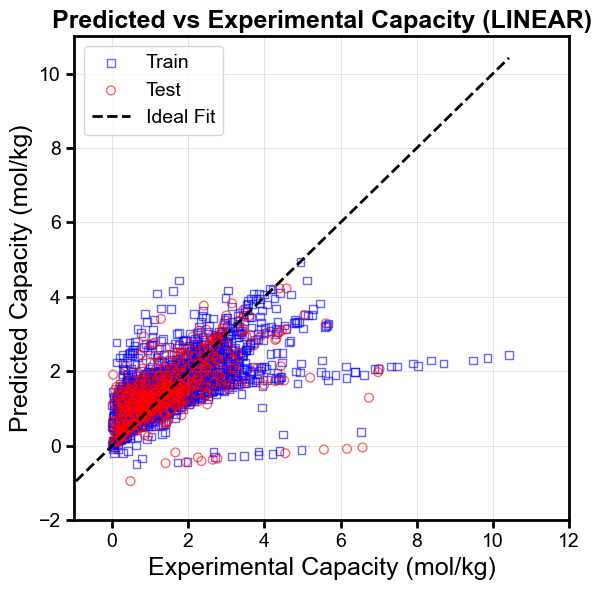

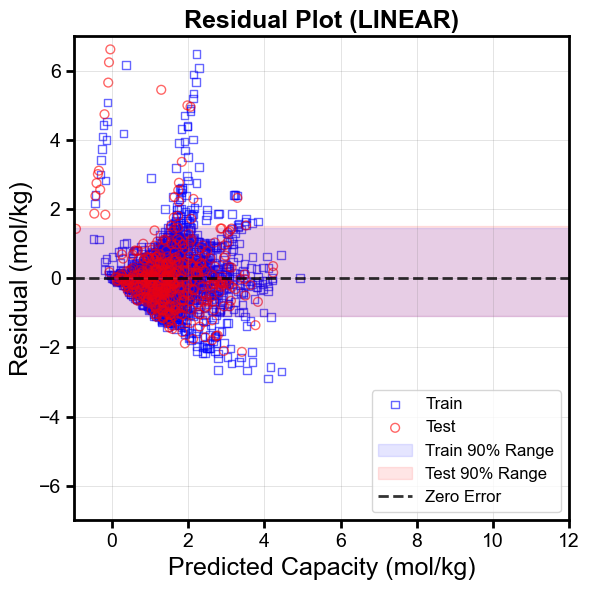

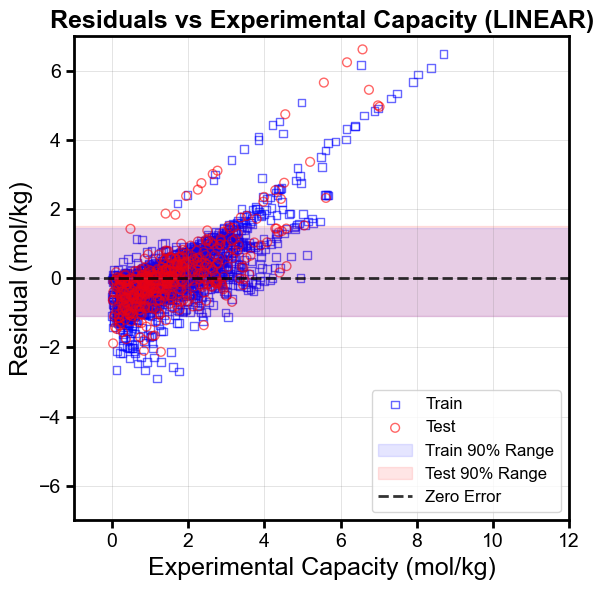

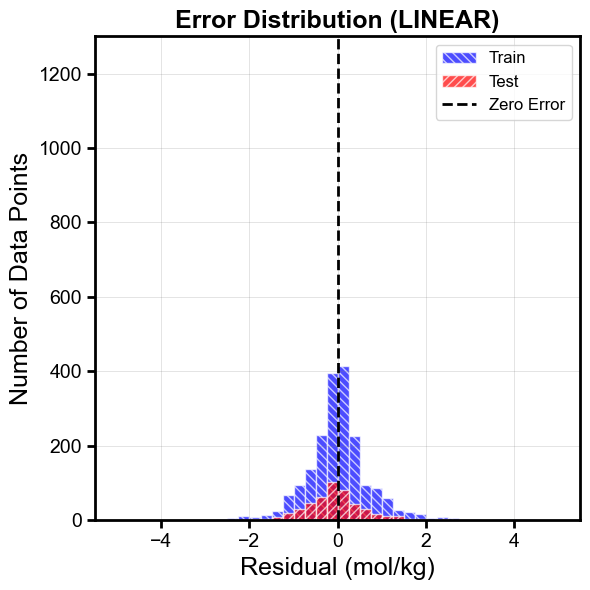

LINEAR 模型详细统计信息
最佳参数: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
训练集R²: 0.3888
测试集R²: 0.2601
训练集MAE: 0.5667 mol/kg
测试集MAE: 0.6169 mol/kg
训练集RMSE: 0.9458 mol/kg
测试集RMSE: 1.0101 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-1.0948, 1.4674] mol/kg
测试集: 90.0% 在 [-1.0932, 1.5048] mol/kg

📊 残差统计:
训练集残差均值: 0.0738 mol/kg (越接近0越好)
测试集残差均值: 0.0637 mol/kg (越接近0越好)
训练集残差标准差: 0.9431 mol/kg (越小越好)
测试集残差标准差: 1.0091 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 810/2000 数据点 (40.5%)
测试集: 186/500 数据点 (37.2%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.0374 mol/kg

生成 RBF 核函数的可视化图表


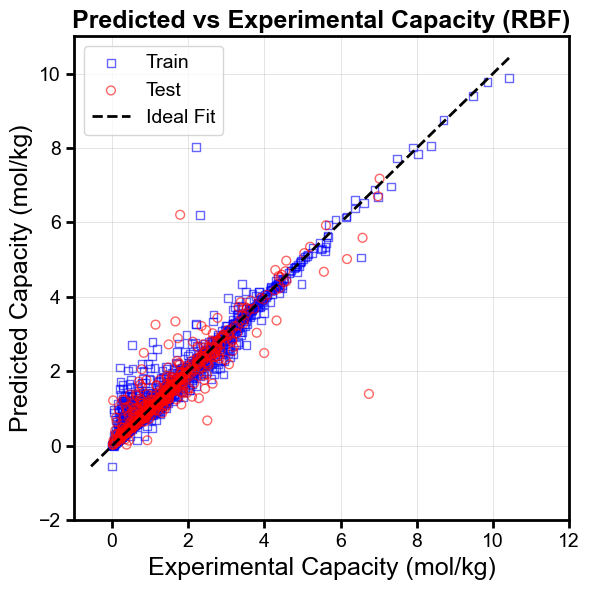

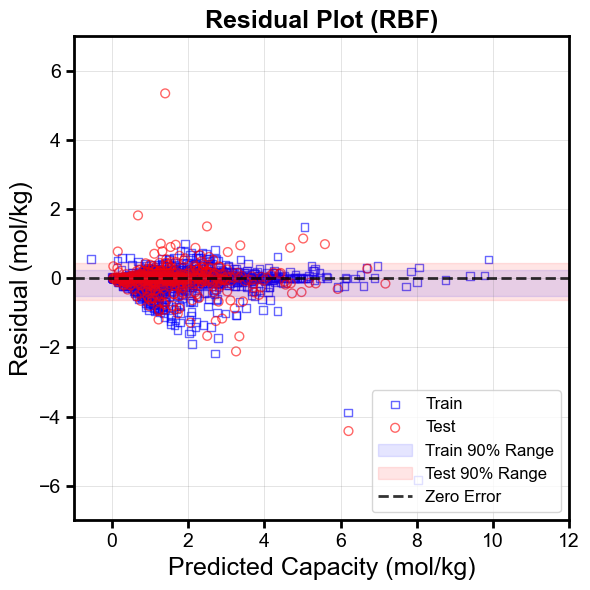

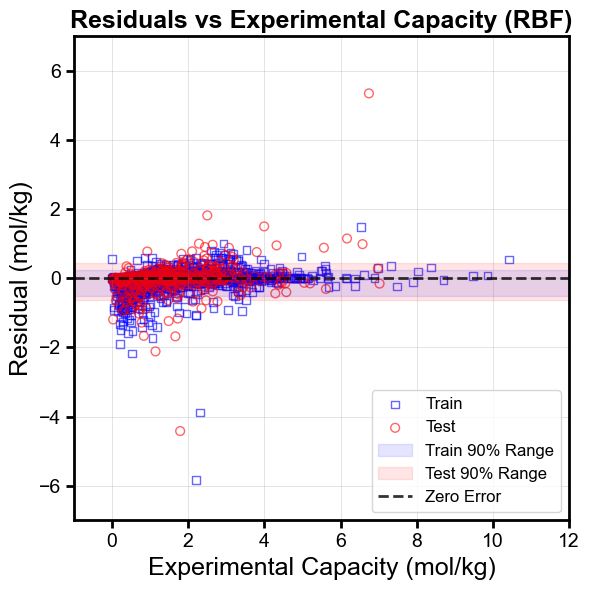

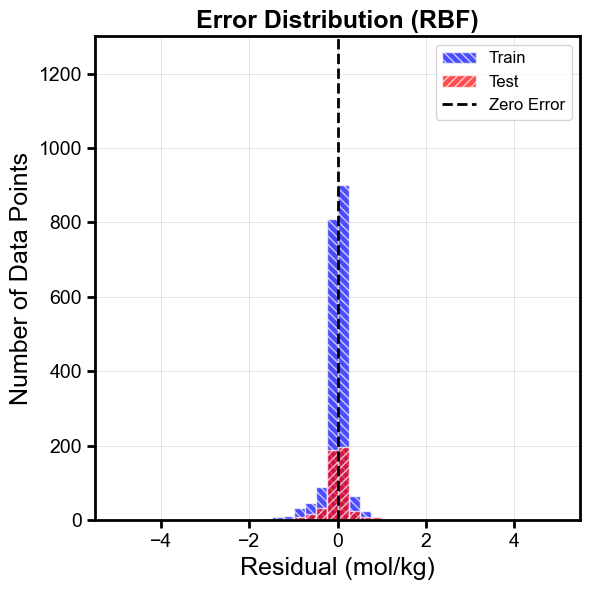

RBF 模型详细统计信息
最佳参数: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
训练集R²: 0.9383
测试集R²: 0.8440
训练集MAE: 0.1268 mol/kg
测试集MAE: 0.2138 mol/kg
训练集RMSE: 0.3006 mol/kg
测试集RMSE: 0.4639 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-0.5157, 0.2410] mol/kg
测试集: 90.0% 在 [-0.6350, 0.4516] mol/kg

📊 残差统计:
训练集残差均值: -0.0407 mol/kg (越接近0越好)
测试集残差均值: -0.0250 mol/kg (越接近0越好)
训练集残差标准差: 0.2979 mol/kg (越小越好)
测试集残差标准差: 0.4637 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 1711/2000 数据点 (85.5%)
测试集: 385/500 数据点 (77.0%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.1193 mol/kg

生成 POLY 核函数的可视化图表


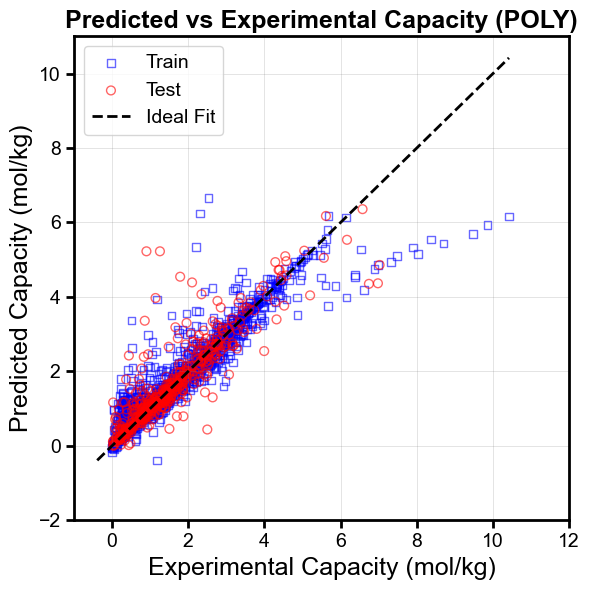

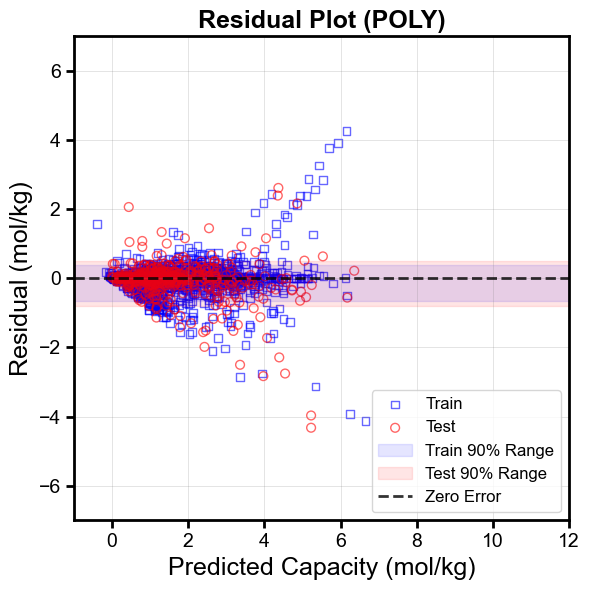

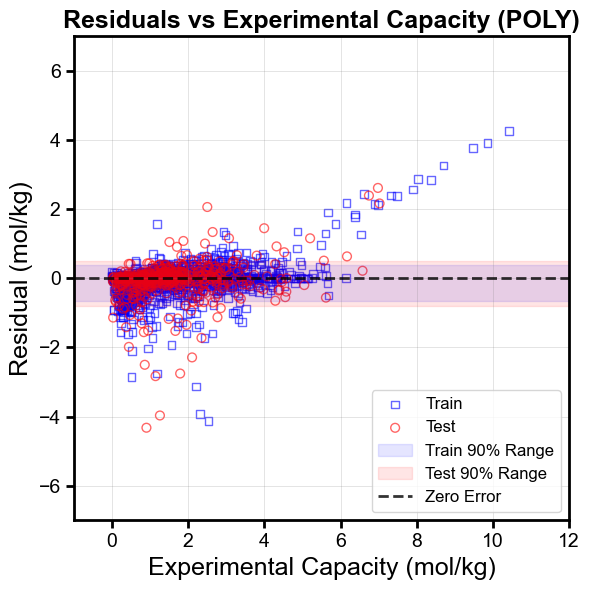

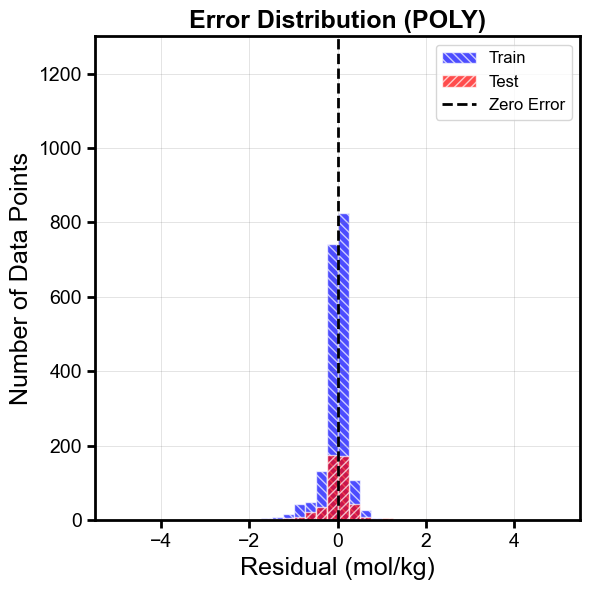

POLY 模型详细统计信息
最佳参数: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
训练集R²: 0.8726
测试集R²: 0.7761
训练集MAE: 0.1956 mol/kg
测试集MAE: 0.2861 mol/kg
训练集RMSE: 0.4318 mol/kg
测试集RMSE: 0.5557 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-0.6651, 0.3722] mol/kg
测试集: 90.0% 在 [-0.7995, 0.4950] mol/kg

📊 残差统计:
训练集残差均值: -0.0317 mol/kg (越接近0越好)
测试集残差均值: -0.0605 mol/kg (越接近0越好)
训练集残差标准差: 0.4308 mol/kg (越小越好)
测试集残差标准差: 0.5530 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 1568/2000 数据点 (78.4%)
测试集: 347/500 数据点 (69.4%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.1344 mol/kg

生成 SIGMOID 核函数的可视化图表


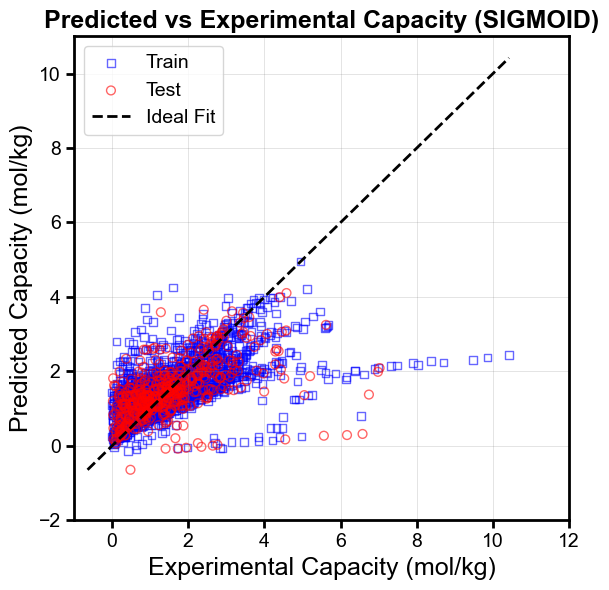

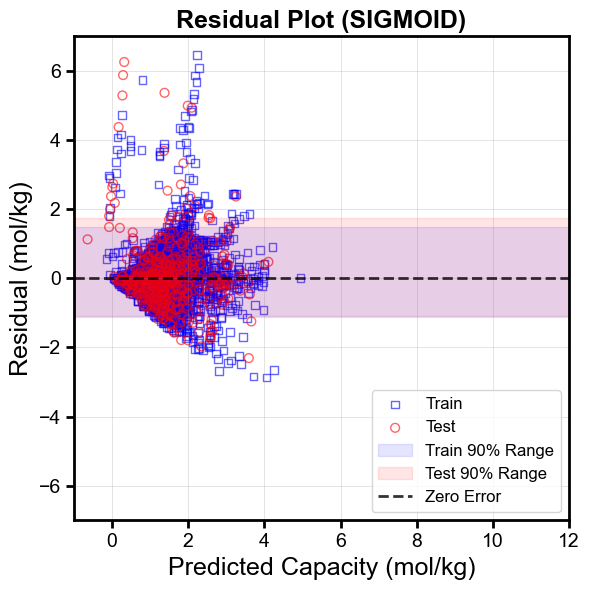

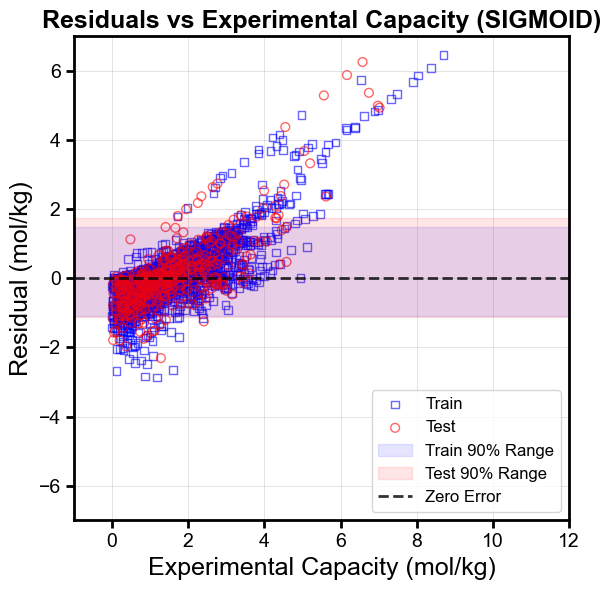

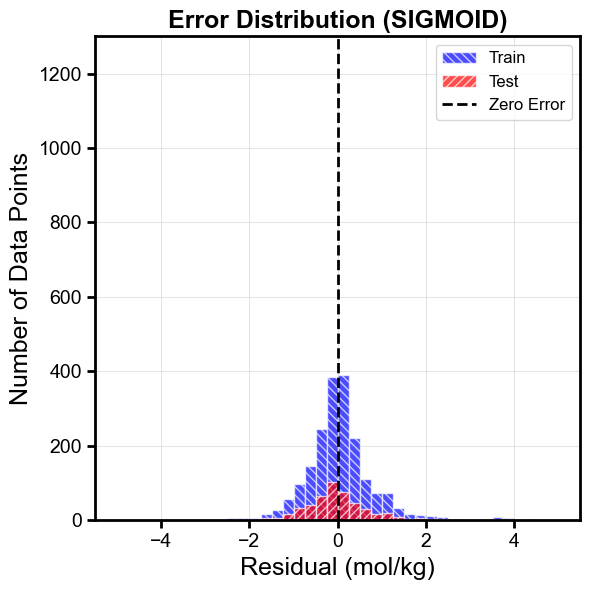

SIGMOID 模型详细统计信息
最佳参数: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
训练集R²: 0.3661
测试集R²: 0.2766
训练集MAE: 0.5818 mol/kg
测试集MAE: 0.6190 mol/kg
训练集RMSE: 0.9632 mol/kg
测试集RMSE: 0.9989 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-1.0941, 1.4900] mol/kg
测试集: 90.0% 在 [-1.1092, 1.7545] mol/kg

📊 残差统计:
训练集残差均值: 0.0939 mol/kg (越接近0越好)
测试集残差均值: 0.0835 mol/kg (越接近0越好)
训练集残差标准差: 0.9588 mol/kg (越小越好)
测试集残差标准差: 0.9964 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 776/2000 数据点 (38.8%)
测试集: 181/500 数据点 (36.2%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.2645 mol/kg


In [33]:
# 从results中的参数重新创建模型
models = {}

for kernel_name in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel_name in results and 'best_params' in results[kernel_name]:
        print(f"重新创建 {kernel_name} 模型...")
        
        # 创建管道
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel=kernel_name))
        ])
        
        # 设置最佳参数
        pipeline.set_params(**results[kernel_name]['best_params'])
        
        # 重新训练模型
        pipeline.fit(X_train, y_train)
        
        models[kernel_name] = {
            'model': pipeline,
            'params': results[kernel_name]['best_params']
        }
        
        # 评估模型性能
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{kernel_name} - 训练集R²: {train_score:.4f}, 测试集R²: {test_score:.4f}")

print("成功重新创建的模型:", list(models.keys()))

# 现在可以使用models字典进行可视化
if models:
    # 存储所有模型的结果
    eval_results = {}
    
    # 为每个核函数生成图表
    for kernel_name, model_info in models.items():
        print(f"\n{'='*80}")
        print(f"生成 {kernel_name.upper()} 核函数的可视化图表")
        print(f"{'='*80}")
        
        metrics = plot_model_evaluation(
            kernel_name=kernel_name.upper(),
            model=model_info['model'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['params']
        )
        
        eval_results[kernel_name] = metrics
else:
    print("没有成功创建任何模型")

In [34]:
def plot_model_evaluation(kernel_name, model, X_train, y_train, X_test, y_test, best_params):
    """为每个核函数模型生成四种可视化图表"""
    
    # 获取预测值
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 计算误差
    train_errors = y_train - y_train_pred
    test_errors = y_test - y_test_pred
    
    # 计算评估指标
    train_r2, train_mae, train_mse, train_rmse, train_aard = calculate_metrics(y_train, y_train_pred)
    test_r2, test_mae, test_mse, test_rmse, test_aard = calculate_metrics(y_test, y_test_pred)
    
    # 计算90%范围
    train_lower, train_upper, train_percentage = calculate_90_percent_range(train_errors)
    test_lower, test_upper, test_percentage = calculate_90_percent_range(test_errors)
    
    # 计算误差在[-0.25, 0.25]范围内的百分比
    def calculate_error_in_range(errors, lower_bound, upper_bound):
        in_range = np.sum((errors >= lower_bound) & (errors <= upper_bound))
        percentage = (in_range / len(errors)) * 100
        return in_range, percentage
    
    train_in_025, train_percent_025 = calculate_error_in_range(train_errors, -0.25, 0.25)
    test_in_025, test_percent_025 = calculate_error_in_range(test_errors, -0.25, 0.25)
    
    # 设置全局样式参数
    border_width = 2.0  # 外框粗细
    tick_fontsize = 14  # 坐标轴标尺字号
    label_fontsize = 16  # 坐标轴标签字号
    title_fontsize = 18  # 标题字号
    tick_width = 2.0    # 刻度线粗细
    tick_length = 6     # 刻度线长度
    
    # 1. 预测值与真实值对比图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    # 设置外框粗细和颜色
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, y_train_pred, color='none', edgecolor='blue', 
               alpha=0.6, s=30, label="Train", linewidth=1, marker='s')
    plt.scatter(y_test, y_test_pred, color='none', edgecolor='red', 
               alpha=0.6, s=40, label="Test", linewidth=1, marker='o')
    
    min_val = min(min(y_train), min(y_test), min(y_train_pred), min(y_test_pred))
    max_val = max(max(y_train), max(y_test), max(y_train_pred), max(y_test_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='black', 
             linestyle='--', linewidth=2, label='Ideal Fit')
    
    # 设置坐标轴范围
    plt.ylim(-2, 11)
    plt.xlim(-1, 12)
    
    plt.xlabel("Experimental Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.ylabel("Predicted Capacity (mol/kg)", fontsize=18, fontname='Arial')
    plt.title(f"Predicted vs Experimental Capacity ({kernel_name})", fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper left', prop={'family': 'Arial', 'size': 14})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    # 设置坐标轴标尺字号
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 2. 残差 vs 预测值图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train_pred, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test_pred, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Predicted Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residual Plot ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 3. 残差 vs 实验值图
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    plt.scatter(y_train, train_errors, alpha=0.6, s=30, color='none', 
                edgecolor='blue', linewidth=1, label='Train', marker='s')
    plt.scatter(y_test, test_errors, alpha=0.6, s=40, color='none', 
                edgecolor='red', linewidth=1, label='Test', marker='o')
    
    plt.axhspan(train_lower, train_upper, alpha=0.1, color='blue', label='Train 90% Range')
    plt.axhspan(test_lower, test_upper, alpha=0.1, color='red', label='Test 90% Range')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(-7, 7)
    plt.xlim(-1, 12)
    
    plt.xlabel('Experimental Capacity (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.title(f'Residuals vs Experimental Capacity ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='lower right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 4. 误差分布图（按指定区间划分）
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)
        spine.set_color('black')
    
    # 按照指定的区间划分：0.25为间隔
    bin_edges = []
    current = 0
    max_error = max(np.abs(train_errors.max()), np.abs(test_errors.max()))
    
    # 生成区间边界
    while current <= max_error + 0.25:
        bin_edges.extend([-current - 0.25, -current])
        if current != 0:
            bin_edges.extend([current, current + 0.25])
        current += 0.25
    
    # 排序并去重
    bin_edges = sorted(set(bin_edges))
    
    # 绘制训练集和测试集误差分布
    plt.hist(train_errors, bins=bin_edges, alpha=0.7, color='blue', 
             edgecolor='white', label='Train', density=False, hatch='\\\\\\\\')
    plt.hist(test_errors, bins=bin_edges, alpha=0.7, color='red', 
             edgecolor='white', label='Test', density=False, hatch='////')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Zero Error')
    
    # 设置坐标轴范围
    plt.ylim(0, 1300)
    plt.xlim(-5.5, 5.5)
    
    plt.xlabel('Residual (mol/kg)', fontsize=18, fontname='Arial')
    plt.ylabel('Number of Data Points', fontsize=18, fontname='Arial')
    plt.title(f'Error Distribution ({kernel_name})', fontsize=title_fontsize, fontweight='bold', fontname='Arial')
    plt.legend(loc='upper right', prop={'family': 'Arial', 'size': 12})
    
    # 设置刻度线
    plt.tick_params(axis='x', which='major', width=tick_width, length=tick_length, 
                   color='black', labelcolor='black', bottom=True, top=False)
    plt.tick_params(axis='y', which='major', width=tick_width, length=tick_length,
                   color='black', labelcolor='black', left=True, right=False)
    
    plt.xticks(fontname='Arial', fontsize=18)
    plt.yticks(fontname='Arial', fontsize=18)
    
    plt.grid(True, alpha=0.3, color='gray', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    # 打印详细的统计信息
    print("="*80)
    print(f"{kernel_name} 模型详细统计信息")
    print("="*80)
    
    # 基本性能指标
    print(f"最佳参数: {best_params}")
    print(f"训练集R²: {train_r2:.4f}")
    print(f"测试集R²: {test_r2:.4f}")
    print(f"训练集MAE: {train_mae:.4f} mol/kg")
    print(f"测试集MAE: {test_mae:.4f} mol/kg")
    print(f"训练集RMSE: {train_rmse:.4f} mol/kg")
    print(f"测试集RMSE: {test_rmse:.4f} mol/kg")
    
    # 残差分析数据
    print(f"\n📊 残差分析 - 90%数据点范围:")
    print(f"训练集: {train_percentage:.1f}% 在 [{train_lower:.4f}, {train_upper:.4f}] mol/kg")
    print(f"测试集: {test_percentage:.1f}% 在 [{test_lower:.4f}, {test_upper:.4f}] mol/kg")
    
    print(f"\n📊 残差统计:")
    print(f"训练集残差均值: {train_errors.mean():.4f} mol/kg (越接近0越好)")
    print(f"测试集残差均值: {test_errors.mean():.4f} mol/kg (越接近0越好)")
    print(f"训练集残差标准差: {train_errors.std():.4f} mol/kg (越小越好)")
    print(f"测试集残差标准差: {test_errors.std():.4f} mol/kg (越小越好)")
    
    # 误差区间统计
    print(f"\n📊 误差在[-0.25, 0.25]范围内:")
    print(f"训练集: {train_in_025}/{len(train_errors)} 数据点 ({train_percent_025:.1f}%)")
    print(f"测试集: {test_in_025}/{len(test_errors)} 数据点 ({test_percent_025:.1f}%)")
    
    # 模型性能评估
    print(f"\n📊 模型性能评估:")
    max_train_error = max(abs(train_lower), abs(train_upper))
    max_test_error = max(abs(test_lower), abs(test_upper))
    
    if max_test_error < 0.1:
        print("✅ 优秀: 90%预测误差 < 0.1 mol/kg")
    elif max_test_error < 0.2:
        print("👍 良好: 90%预测误差 < 0.2 mol/kg")
    elif max_test_error < 0.3:
        print("⚠️ 一般: 90%预测误差 < 0.3 mol/kg")
    else:
        print("❌ 需要改进: 预测误差较大")
    
    print(f"过拟合程度: {abs(max_train_error - max_test_error):.4f} mol/kg")
    
    return {
        'train_r2': train_r2, 'test_r2': test_r2,
        'train_mae': train_mae, 'test_mae': test_mae,
        'train_mse': train_mse, 'test_mse': test_mse,
        'train_rmse': train_rmse, 'test_rmse': test_rmse,
        'train_aard': train_aard, 'test_aard': test_aard,
        'train_90_range': (train_lower, train_upper, train_percentage),
        'test_90_range': (test_lower, test_upper, test_percentage),
        'train_in_025': (train_in_025, train_percent_025),
        'test_in_025': (test_in_025, test_percent_025)
    }

重新创建 linear 模型...
linear - 训练集R²: 0.3888, 测试集R²: 0.2601
重新创建 rbf 模型...
rbf - 训练集R²: 0.9383, 测试集R²: 0.8440
重新创建 poly 模型...
poly - 训练集R²: 0.8726, 测试集R²: 0.7761
重新创建 sigmoid 模型...
sigmoid - 训练集R²: 0.3661, 测试集R²: 0.2766
成功重新创建的模型: ['linear', 'rbf', 'poly', 'sigmoid']

生成 LINEAR 核函数的可视化图表


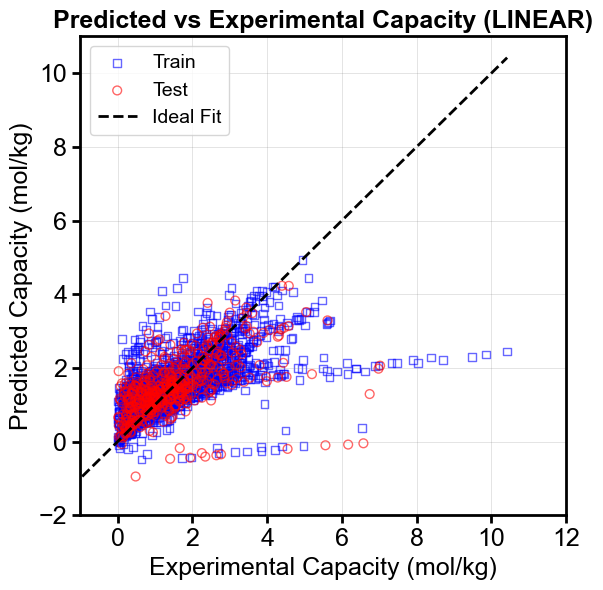

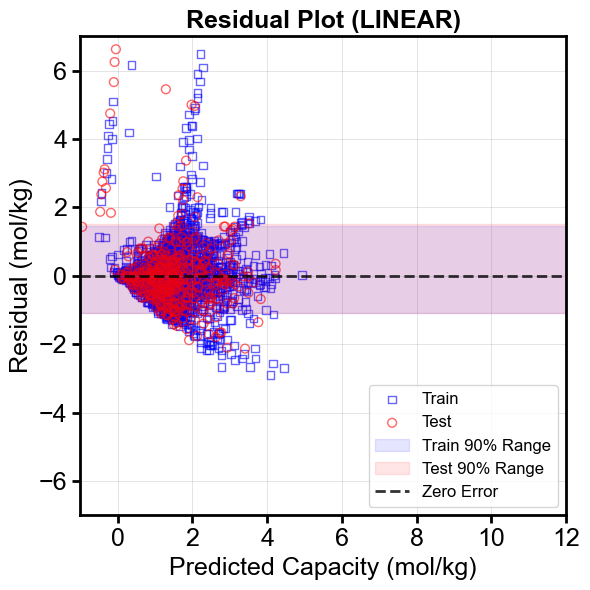

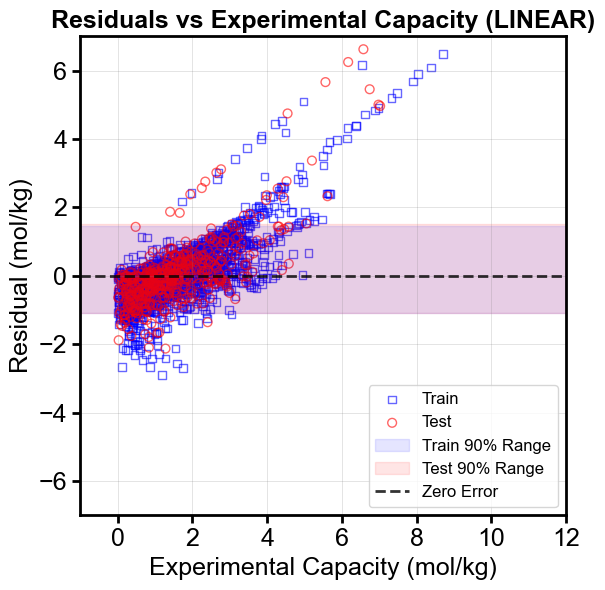

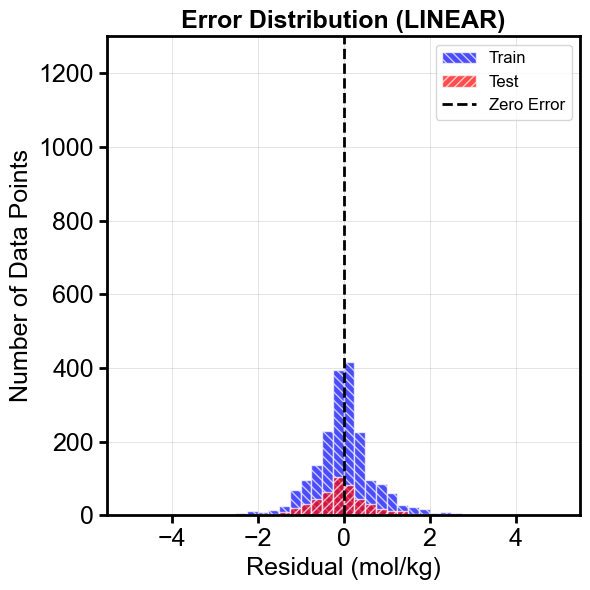

LINEAR 模型详细统计信息
最佳参数: {'svr__C': 0.10257451272312866, 'svr__epsilon': 0.015982104772500425}
训练集R²: 0.3888
测试集R²: 0.2601
训练集MAE: 0.5667 mol/kg
测试集MAE: 0.6169 mol/kg
训练集RMSE: 0.9458 mol/kg
测试集RMSE: 1.0101 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-1.0948, 1.4674] mol/kg
测试集: 90.0% 在 [-1.0932, 1.5048] mol/kg

📊 残差统计:
训练集残差均值: 0.0738 mol/kg (越接近0越好)
测试集残差均值: 0.0637 mol/kg (越接近0越好)
训练集残差标准差: 0.9431 mol/kg (越小越好)
测试集残差标准差: 1.0091 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 810/2000 数据点 (40.5%)
测试集: 186/500 数据点 (37.2%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.0374 mol/kg

生成 RBF 核函数的可视化图表


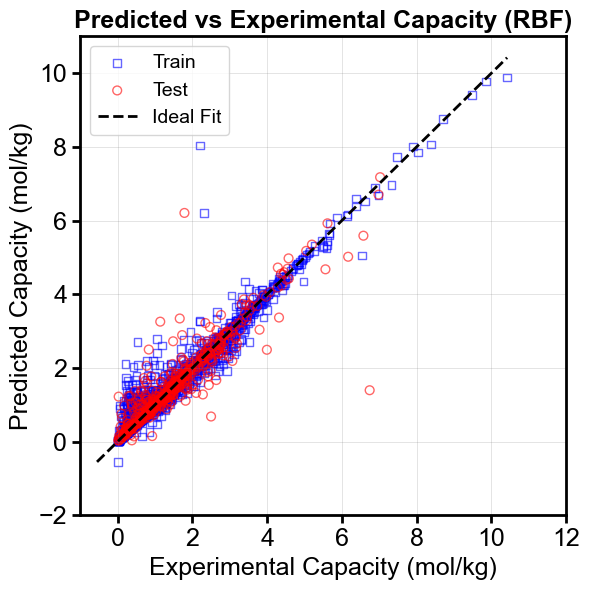

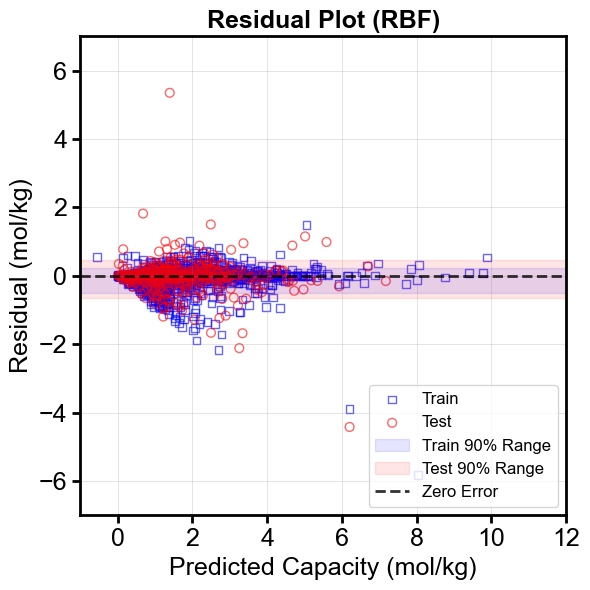

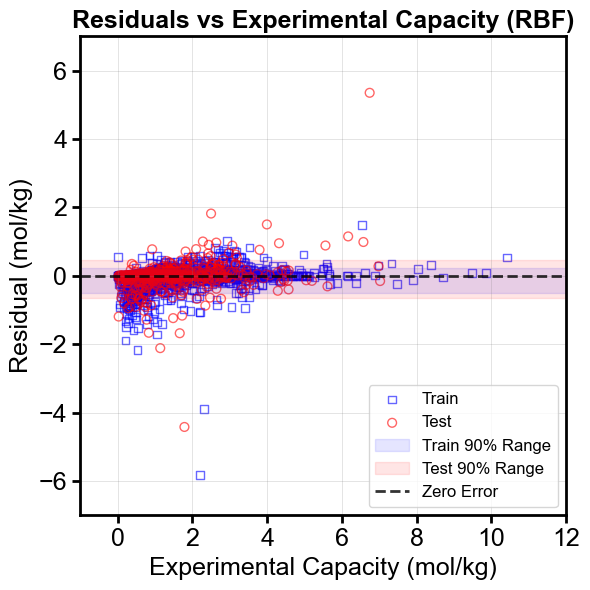

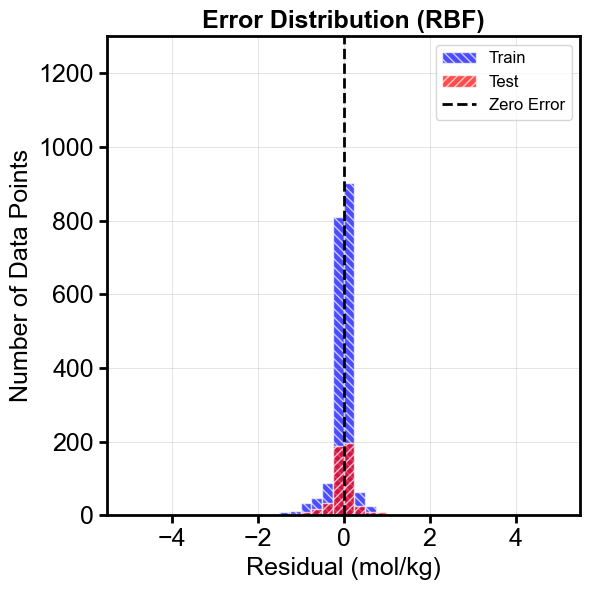

RBF 模型详细统计信息
最佳参数: {'svr__C': 34.879281104286264, 'svr__epsilon': 0.006901630770467411, 'svr__gamma': 0.21197417334052496}
训练集R²: 0.9383
测试集R²: 0.8440
训练集MAE: 0.1268 mol/kg
测试集MAE: 0.2138 mol/kg
训练集RMSE: 0.3006 mol/kg
测试集RMSE: 0.4639 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-0.5157, 0.2410] mol/kg
测试集: 90.0% 在 [-0.6350, 0.4516] mol/kg

📊 残差统计:
训练集残差均值: -0.0407 mol/kg (越接近0越好)
测试集残差均值: -0.0250 mol/kg (越接近0越好)
训练集残差标准差: 0.2979 mol/kg (越小越好)
测试集残差标准差: 0.4637 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 1711/2000 数据点 (85.5%)
测试集: 385/500 数据点 (77.0%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.1193 mol/kg

生成 POLY 核函数的可视化图表


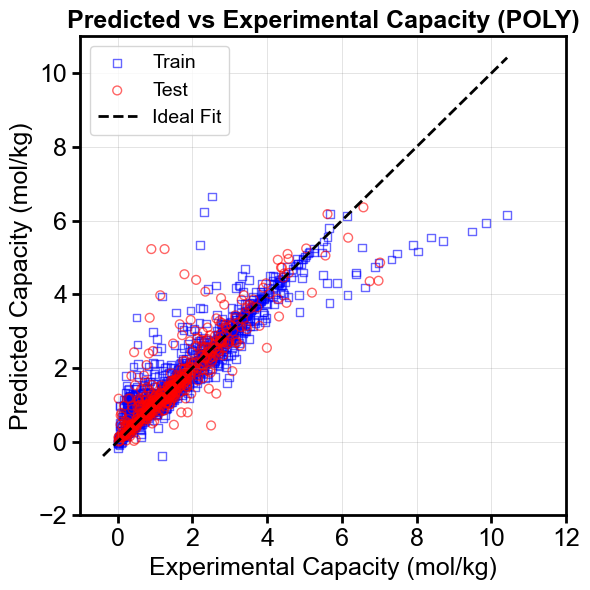

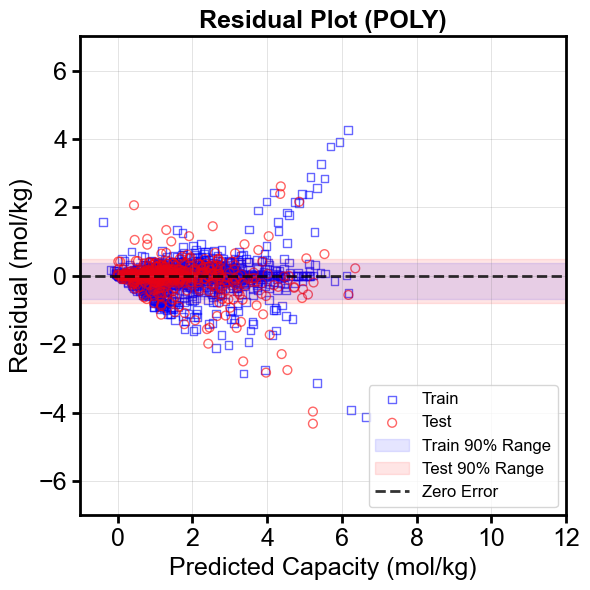

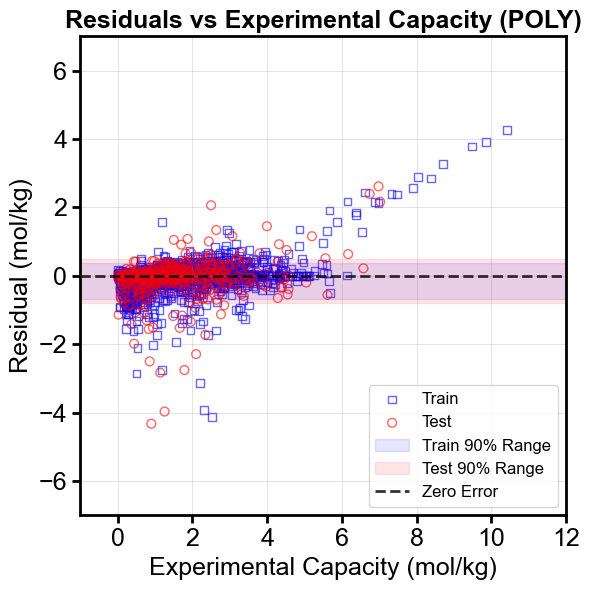

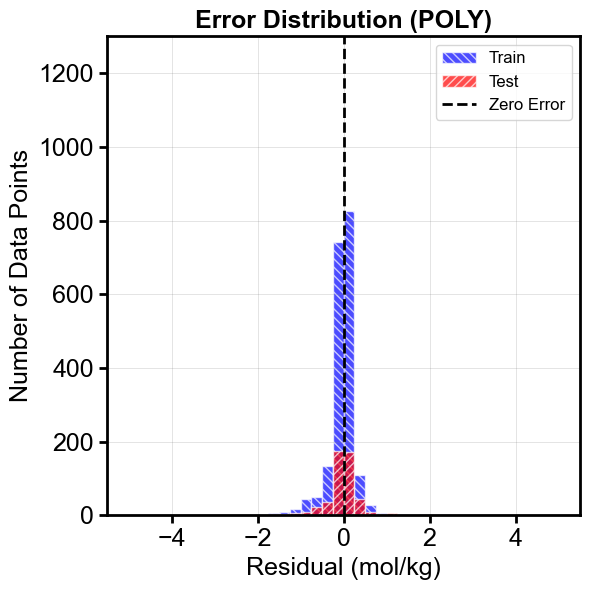

POLY 模型详细统计信息
最佳参数: {'svr__C': 604.5915517293635, 'svr__coef0': 0.7495513992401993, 'svr__degree': 3, 'svr__epsilon': 0.008276508883382664}
训练集R²: 0.8726
测试集R²: 0.7761
训练集MAE: 0.1956 mol/kg
测试集MAE: 0.2861 mol/kg
训练集RMSE: 0.4318 mol/kg
测试集RMSE: 0.5557 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-0.6651, 0.3722] mol/kg
测试集: 90.0% 在 [-0.7995, 0.4950] mol/kg

📊 残差统计:
训练集残差均值: -0.0317 mol/kg (越接近0越好)
测试集残差均值: -0.0605 mol/kg (越接近0越好)
训练集残差标准差: 0.4308 mol/kg (越小越好)
测试集残差标准差: 0.5530 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 1568/2000 数据点 (78.4%)
测试集: 347/500 数据点 (69.4%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.1344 mol/kg

生成 SIGMOID 核函数的可视化图表


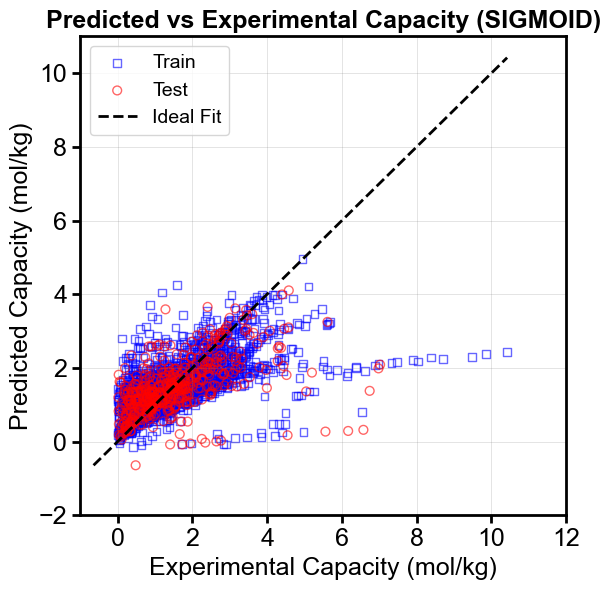

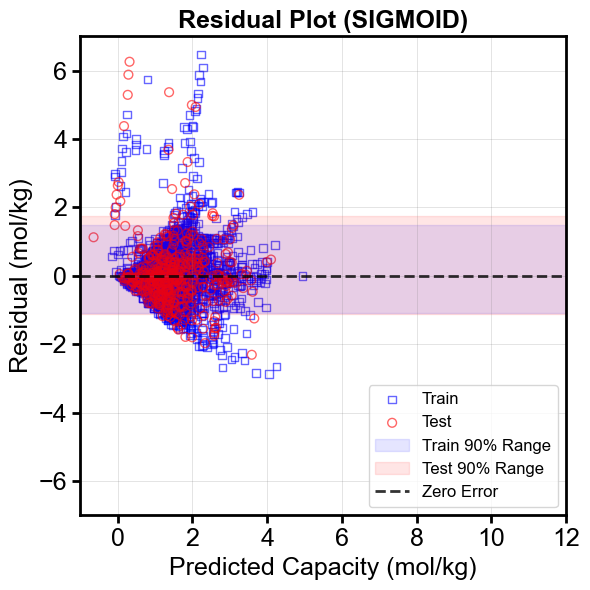

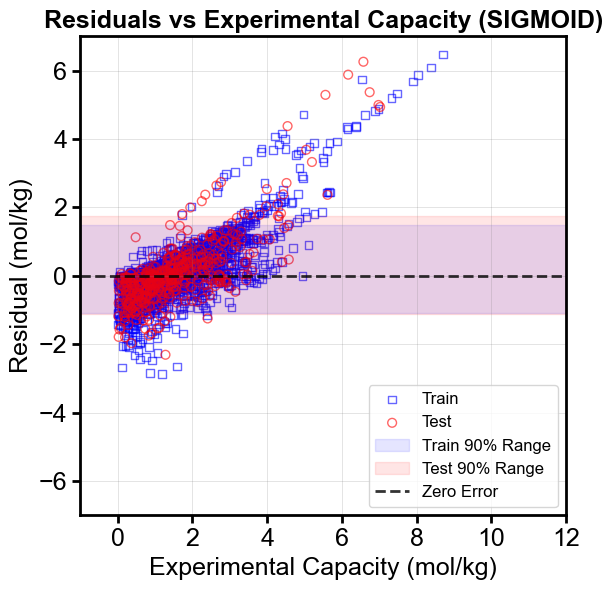

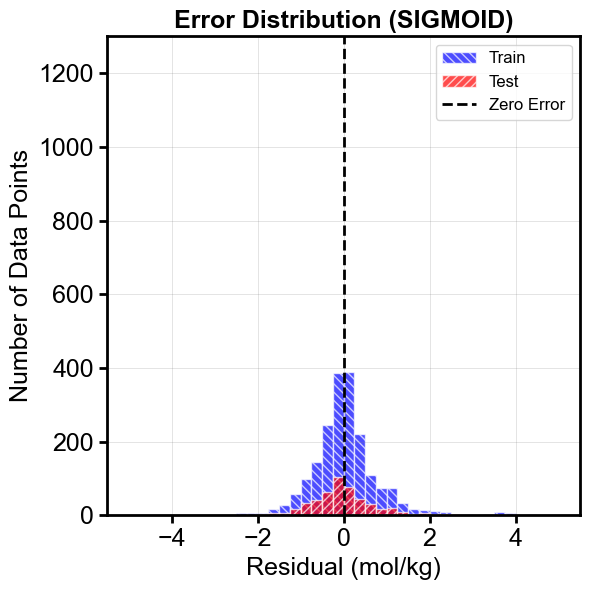

SIGMOID 模型详细统计信息
最佳参数: {'svr__C': 265.923975925871, 'svr__coef0': 0.04844189034552504, 'svr__epsilon': 0.0012501565002126212, 'svr__gamma': 4.622351923490326e-05}
训练集R²: 0.3661
测试集R²: 0.2766
训练集MAE: 0.5818 mol/kg
测试集MAE: 0.6190 mol/kg
训练集RMSE: 0.9632 mol/kg
测试集RMSE: 0.9989 mol/kg

📊 残差分析 - 90%数据点范围:
训练集: 90.0% 在 [-1.0941, 1.4900] mol/kg
测试集: 90.0% 在 [-1.1092, 1.7545] mol/kg

📊 残差统计:
训练集残差均值: 0.0939 mol/kg (越接近0越好)
测试集残差均值: 0.0835 mol/kg (越接近0越好)
训练集残差标准差: 0.9588 mol/kg (越小越好)
测试集残差标准差: 0.9964 mol/kg (越小越好)

📊 误差在[-0.25, 0.25]范围内:
训练集: 776/2000 数据点 (38.8%)
测试集: 181/500 数据点 (36.2%)

📊 模型性能评估:
❌ 需要改进: 预测误差较大
过拟合程度: 0.2645 mol/kg


In [35]:
# 从results中的参数重新创建模型
models = {}

for kernel_name in ['linear', 'rbf', 'poly', 'sigmoid']:
    if kernel_name in results and 'best_params' in results[kernel_name]:
        print(f"重新创建 {kernel_name} 模型...")
        
        # 创建管道
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('svr', SVR(kernel=kernel_name))
        ])
        
        # 设置最佳参数
        pipeline.set_params(**results[kernel_name]['best_params'])
        
        # 重新训练模型
        pipeline.fit(X_train, y_train)
        
        models[kernel_name] = {
            'model': pipeline,
            'params': results[kernel_name]['best_params']
        }
        
        # 评估模型性能
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{kernel_name} - 训练集R²: {train_score:.4f}, 测试集R²: {test_score:.4f}")

print("成功重新创建的模型:", list(models.keys()))

# 现在可以使用models字典进行可视化
if models:
    # 存储所有模型的结果
    eval_results = {}
    
    # 为每个核函数生成图表
    for kernel_name, model_info in models.items():
        print(f"\n{'='*80}")
        print(f"生成 {kernel_name.upper()} 核函数的可视化图表")
        print(f"{'='*80}")
        
        metrics = plot_model_evaluation(
            kernel_name=kernel_name.upper(),
            model=model_info['model'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            best_params=model_info['params']
        )
        
        eval_results[kernel_name] = metrics
else:
    print("没有成功创建任何模型")


PREDICTION RESULTS FOR ALL SVR MODELS
为 linear 计算预测结果...

LINEAR 预测结果统计:
训练集样本数: 2000
测试集样本数: 500
训练集平均绝对误差: 0.5667
测试集平均绝对误差: 0.6169
训练集R²: 0.3888
测试集R²: 0.2601
为 rbf 计算预测结果...

RBF 预测结果统计:
训练集样本数: 2000
测试集样本数: 500
训练集平均绝对误差: 0.1268
测试集平均绝对误差: 0.2138
训练集R²: 0.9383
测试集R²: 0.8440
为 poly 计算预测结果...

POLY 预测结果统计:
训练集样本数: 2000
测试集样本数: 500
训练集平均绝对误差: 0.1956
测试集平均绝对误差: 0.2861
训练集R²: 0.8726
测试集R²: 0.7761
为 sigmoid 计算预测结果...

SIGMOID 预测结果统计:
训练集样本数: 2000
测试集样本数: 500
训练集平均绝对误差: 0.5818
测试集平均绝对误差: 0.6190
训练集R²: 0.3661
测试集R²: 0.2766

前20行预测结果:
    Kernel Dataset  True_y  Predicted_y  Absolute_Error  Relative_Error_%
0   linear   Train  9.8530       2.3652          7.4878           75.9948
1   linear   Train  1.9806       2.2183          0.2377           12.0012
2   linear   Train  1.5088       1.9105          0.4017           26.6213
3   linear   Train  0.2609       0.2022          0.0587           22.4962
4   linear   Train  0.1360       1.1377          1.0017          736.5103
5   linear   Train

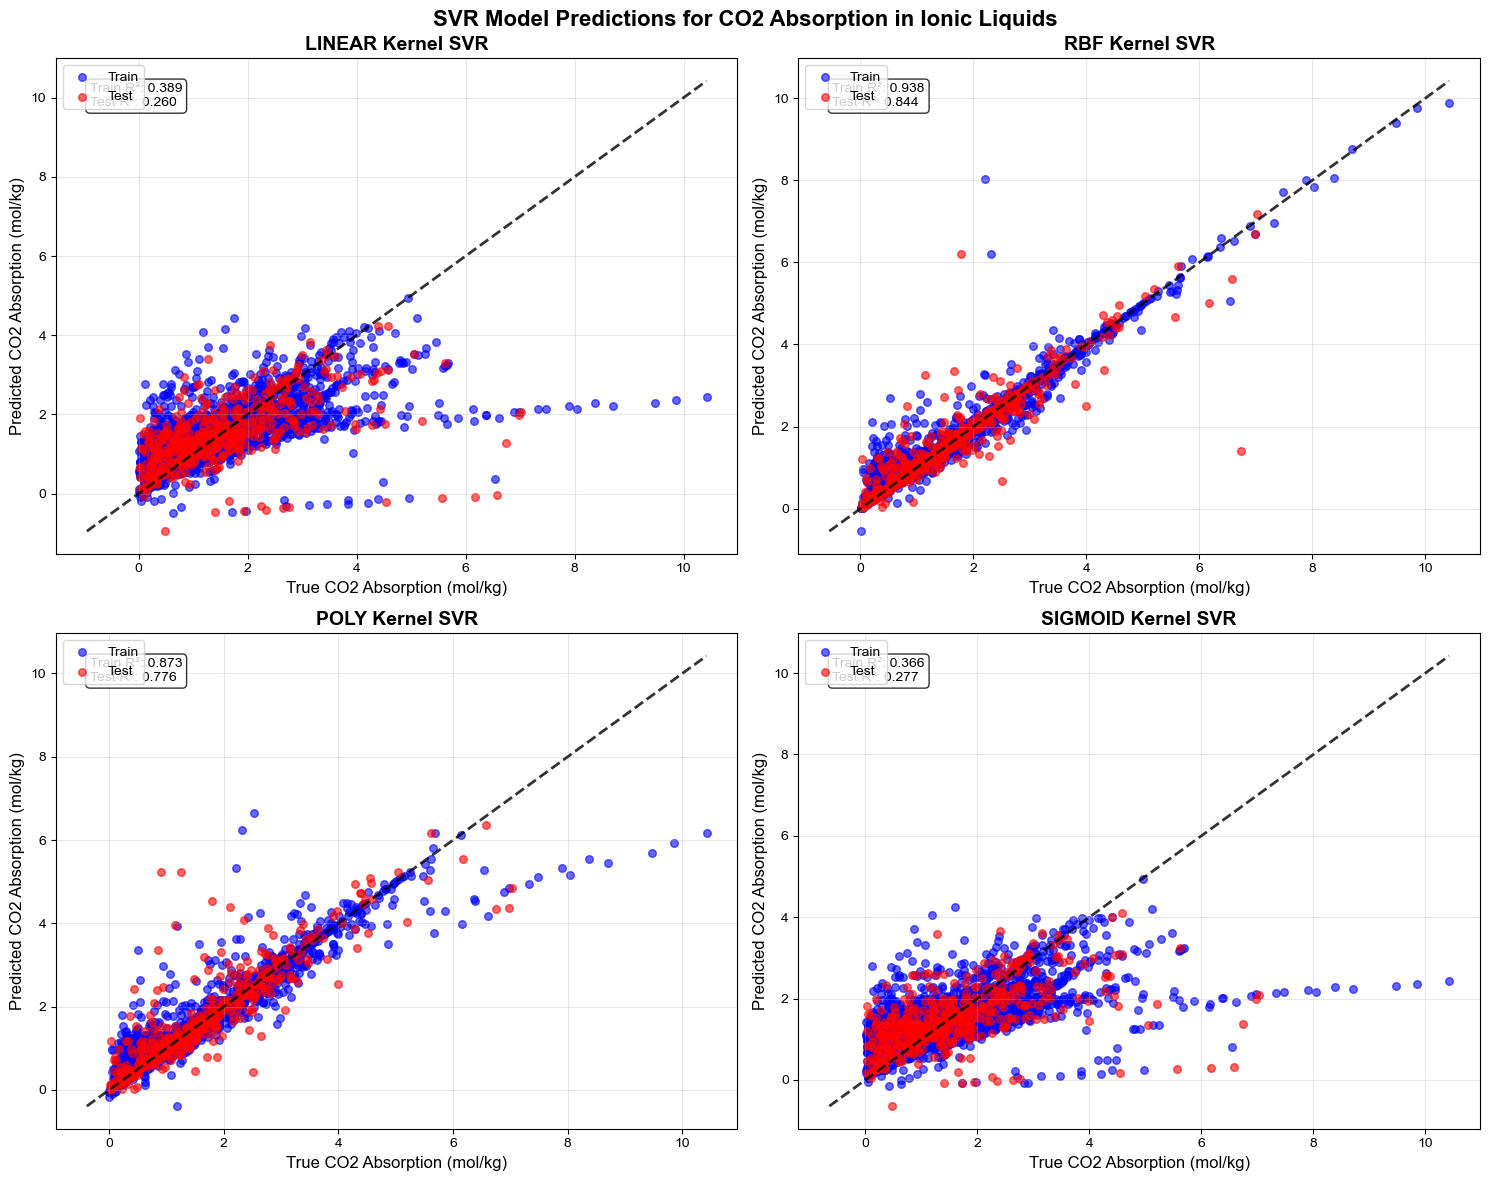


最佳模型: RBF 核函数
测试集R²: 0.8440
测试集RMSE: 0.4639
测试集AARD%: 32.3137
最佳模型已保存为 'E:\RNZhang\CO2 capacity\修改\SVR修改_four kernel - 副本\best_model_rbf.pkl'


In [36]:
# 6. 输出所有模型的预测结果
print("\n" + "="*80)
print("PREDICTION RESULTS FOR ALL SVR MODELS")
print("="*80)

# 创建DataFrame来存储所有预测结果
all_predictions = []

for kernel_name, res in results.items():
    # 直接使用最佳模型重新计算预测结果，确保准确性
    print(f"为 {kernel_name} 计算预测结果...")
    best_model = res['best_model']
    
    # 计算训练集和测试集的预测
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # 创建训练集预测结果DataFrame
    train_df = pd.DataFrame({
        'Kernel': kernel_name,
        'Dataset': 'Train',
        'True_y': y_train,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train - y_train_pred),
        'Relative_Error_%': np.abs((y_train - y_train_pred) / np.clip(np.abs(y_train), 1e-10, None)) * 100
    })
    
    # 创建测试集预测结果DataFrame
    test_df = pd.DataFrame({
        'Kernel': kernel_name,
        'Dataset': 'Test',
        'True_y': y_test,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test - y_test_pred),
        'Relative_Error_%': np.abs((y_test - y_test_pred) / np.clip(np.abs(y_test), 1e-10, None)) * 100
    })
    
    # 合并训练集和测试集结果
    kernel_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(kernel_df)
    
    # 输出每个核函数的预测结果统计
    print(f"\n{kernel_name.upper()} 预测结果统计:")
    print(f"训练集样本数: {len(y_train)}")
    print(f"测试集样本数: {len(y_test)}")
    print(f"训练集平均绝对误差: {np.mean(np.abs(y_train - y_train_pred)):.4f}")
    print(f"测试集平均绝对误差: {np.mean(np.abs(y_test - y_test_pred)):.4f}")
    print(f"训练集R²: {r2_score(y_train, y_train_pred):.4f}")
    print(f"测试集R²: {r2_score(y_test, y_test_pred):.4f}")

# 合并所有核函数的预测结果
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# 输出前20行预测结果
print("\n前20行预测结果:")
print(all_predictions_df.head(20).round(4))

# 按核函数和数据集分组统计
print("\n按核函数和数据集分组的预测误差统计:")
grouped_stats = all_predictions_df.groupby(['Kernel', 'Dataset']).agg({
    'Absolute_Error': ['mean', 'std', 'min', 'max'],
    'Relative_Error_%': ['mean', 'std', 'min', 'max']
}).round(4)
print(grouped_stats)



# 保存预测结果到CSV文件
import os
import joblib

# 保存预测结果到CSV文件（保存到.ipynb所在目录）
csv_filename = 'all_model_predictions.csv'
all_predictions_df.to_csv(csv_filename, index=False)

# 获取完整的绝对路径并显示
csv_absolute_path = os.path.abspath(csv_filename)
print(f"\n所有预测结果已保存到 '{csv_absolute_path}'")




# 7. 可视化预测结果
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, kernel_name in enumerate(kernels):
    if kernel_name in results:
        # 获取该核函数的预测结果
        kernel_data = all_predictions_df[all_predictions_df['Kernel'] == kernel_name]
        
        # 分离训练集和测试集
        train_data = kernel_data[kernel_data['Dataset'] == 'Train']
        test_data = kernel_data[kernel_data['Dataset'] == 'Test']
        
        # 绘制散点图
        axes[i].scatter(train_data['True_y'], train_data['Predicted_y'], 
                       alpha=0.6, label='Train', c='blue', s=30)
        axes[i].scatter(test_data['True_y'], test_data['Predicted_y'], 
                       alpha=0.6, label='Test', c='red', s=30)
        
        # 添加理想预测线
        min_val = min(kernel_data['True_y'].min(), kernel_data['Predicted_y'].min())
        max_val = max(kernel_data['True_y'].max(), kernel_data['Predicted_y'].max())
        axes[i].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, linewidth=2)
        
        axes[i].set_xlabel('True CO2 Absorption (mol/kg)', fontsize=12)
        axes[i].set_ylabel('Predicted CO2 Absorption (mol/kg)', fontsize=12)
        axes[i].set_title(f'{kernel_name.upper()} Kernel SVR', fontsize=14, fontweight='bold')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # 添加R²值到图中
        train_r2 = r2_score(train_data['True_y'], train_data['Predicted_y'])
        test_r2 = r2_score(test_data['True_y'], test_data['Predicted_y'])
        axes[i].text(0.05, 0.95, f'Train R²: {train_r2:.3f}\nTest R²: {test_r2:.3f}', 
                    transform=axes[i].transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('SVR Model Predictions for CO2 Absorption in Ionic Liquids', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('svr_prediction_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. 输出最佳模型（基于测试集R2）
best_kernel = max(results.items(), key=lambda x: x[1]['test_metrics']['R2'])[0]
print(f"\n最佳模型: {best_kernel.upper()} 核函数")
print(f"测试集R²: {results[best_kernel]['test_metrics']['R2']:.4f}")
print(f"测试集RMSE: {results[best_kernel]['test_metrics']['RMSE']:.4f}")
print(f"测试集AARD%: {results[best_kernel]['test_metrics']['AARD%']:.4f}")


# 保存最佳模型（保存到.ipynb所在目录）
best_model_filename = f'best_model_{best_kernel}.pkl'
joblib.dump(results[best_kernel]['best_model'], best_model_filename)

# 获取完整的绝对路径并显示
model_absolute_path = os.path.abspath(best_model_filename)
print(f"最佳模型已保存为 '{model_absolute_path}'")

In [37]:
# 获取训练集和测试集的原始索引
train_indices = X_train.index  # 训练集的原始索引
test_indices = X_test.index    # 测试集的原始索引

# 从原始数据中获取对应的No.和IL
train_no = data.loc[train_indices, 'No.'].values
train_il = data.loc[train_indices, 'IL'].values
test_no = data.loc[test_indices, 'No.'].values
test_il = data.loc[test_indices, 'IL'].values

all_predictions = []

for kernel_name, res in results.items():
    print(f"为 {kernel_name} 计算预测结果...")
    best_model = res['best_model']
    
    # 计算训练集和测试集的预测
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # 创建训练集预测结果DataFrame
    train_df = pd.DataFrame({
        'No.': train_no,
        'IL': train_il,
        'Kernel': kernel_name,
        'Dataset': 'Train',
        'True_y': y_train.values,
        'Predicted_y': y_train_pred,
        'Absolute_Error': np.abs(y_train.values - y_train_pred),
        'Relative_Error_%': np.abs((y_train.values - y_train_pred) / np.clip(np.abs(y_train.values), 1e-10, None)) * 100
    })
    
    # 创建测试集预测结果DataFrame
    test_df = pd.DataFrame({
        'No.': test_no,
        'IL': test_il,
        'Kernel': kernel_name,
        'Dataset': 'Test',
        'True_y': y_test.values,
        'Predicted_y': y_test_pred,
        'Absolute_Error': np.abs(y_test.values - y_test_pred),
        'Relative_Error_%': np.abs((y_test.values - y_test_pred) / np.clip(np.abs(y_test.values), 1e-10, None)) * 100
    })
    
    # 合并训练集和测试集结果
    kernel_df = pd.concat([train_df, test_df], ignore_index=True)
    all_predictions.append(kernel_df)

# 合并所有核函数的预测结果
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# 按No.排序
all_predictions_df = all_predictions_df.sort_values(['No.', 'Kernel', 'Dataset']).reset_index(drop=True)

# 保存预测结果到CSV文件
csv_filename = 'all_model_predictions_with_ids.csv'
all_predictions_df.to_csv(csv_filename, index=False)

print(f"\n所有预测结果已保存到 '{csv_filename}'")
print(f"文件包含以下列: {list(all_predictions_df.columns)}")



为 linear 计算预测结果...
为 rbf 计算预测结果...
为 poly 计算预测结果...
为 sigmoid 计算预测结果...

所有预测结果已保存到 'all_model_predictions_with_ids.csv'
文件包含以下列: ['No.', 'IL', 'Kernel', 'Dataset', 'True_y', 'Predicted_y', 'Absolute_Error', 'Relative_Error_%']


In [ ]:
#### 代码完